# Loading Data

In [ ]:
!mkdir /root/.kaggle
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download fedesoriano/heart-failure-prediction

  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 8.62MB/s]


In [ ]:
!unzip heart-failure-prediction.zip

Archive:  heart-failure-prediction.zip
  inflating: heart.csv               


In [ ]:
import pandas as pd
data = pd.read_csv("/content/heart.csv", sep=',')

# EDA

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Text(0, 0.5, 'values')

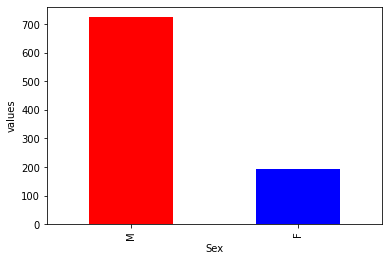

In [ ]:
import matplotlib.pyplot as plt

data['Sex'].value_counts().plot.bar(color = ['red','blue'])
plt.xlabel('Sex')
plt.ylabel('values')

Text(0, 0.5, 'values')

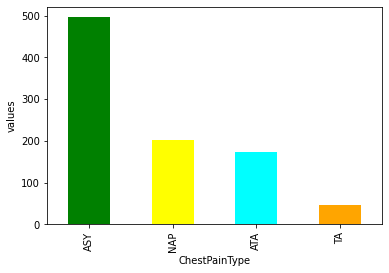

In [ ]:
data['ChestPainType'].value_counts().plot.bar(color = ['green','yellow','cyan','orange'])
plt.xlabel('ChestPainType')
plt.ylabel('values')

In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
y = data['HeartDisease']

In [ ]:
x = data.drop(columns =['HeartDisease'],axis = 1)

In [ ]:
x = pd.get_dummies(x,columns=['ChestPainType','Sex','RestingECG','ExerciseAngina','ST_Slope'])
x.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_F,Sex_M,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,0,0,1,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,0,0,1,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,0,0,1,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,1,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,0,1,0,1,0,1,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Normalization

In [ ]:
x_max = x_train.max()
x_min = x_train.min()

In [ ]:
x_train_norm = (x_train - x_min).div(x_max - x_min)
x_test_norm = (x_test - x_min).div(x_max - x_min)

# Learning

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

boost = XGBClassifier(n_estimators=100) 
boost.fit(x_train, y_train)
predicted = boost.predict(x_test)   # for accuracy
predicted_proba = boost.predict_proba(x_test)[:, 1]   # for log_loss
print('acc',accuracy_score(predicted,y_test))
print('log',log_loss(y_test,predicted_proba))

acc 0.8731884057971014
log 0.3402840786055068


#Learning (norm)

In [ ]:
boost = XGBClassifier(n_estimators=100) 
boost.fit(x_train_norm, y_train)
predicted = boost.predict(x_test_norm)   # for accuracy
predicted_proba = boost.predict_proba(x_test_norm)[:, 1]   # for log_loss
print('acc',accuracy_score(predicted,y_test))
print('log',log_loss(y_test,predicted_proba))

acc 0.8731884057971014
log 0.3402373207053102
